In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools    

In [27]:
count_vectorizer = pickle.load(open('../models/count_vector.pkl', 'rb'))
model = pickle.load(open('../models/naiiveBayes.pkl', 'rb'))
conf_matrix = pickle.load(open('../models/conf_matrix.pkl', 'rb'))
df = pickle.load(open('../models/data_frame.pkl', 'rb'))
accuracy = pickle.load(open('../models/accuracy.pkl', 'rb'))

In [14]:
del df['Unnamed: 0']
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
df.groupby('label').count()

,Unnamed: 0,title,text
label,,,
FAKE,3164,3164,3164
REAL,3171,3171,3171


In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

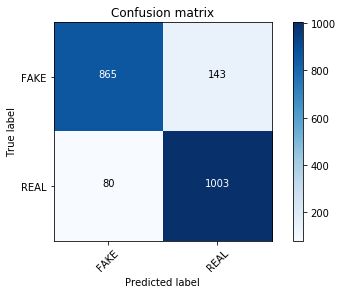

In [6]:
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'])

In [7]:
count_vectorizer.vocabulary_

{'report': 42470,
 'copyright': 12105,
 'violation': 54177,
 'think': 50628,
 'doom': 15924,
 'sayers': 44520,
 'trump': 51896,
 'office': 35783,
 'notice': 35256,
 'glp': 21881,
 'republican': 42534,
 'bush': 8399,
 'left': 29531,
 'doomsaying': 15927,
 'increases': 25686,
 'sure': 49203,
 'effect': 16814,
 'opposite': 36087,
 'gets': 21568,
 'increase': 25684,
 'political': 38823,
 'spectrum': 47506,
 'page': 36831,
 'election': 16972,
 '232': 762,
 'photos': 38140,
 '43': 1127,
 'numbers': 35403,
 '131': 229,
 'quotes': 40794,
 'candidates': 8779,
 'center': 9445,
 'email': 17139,
 'wonder': 55615,
 'mind': 32729,
 'today': 51050,
 'notable': 35236,
 'people': 37695,
 'don': 15867,
 'miss': 32983,
 'unbelievable': 52435,
 'roundup': 43680,
 'best': 6494,
 'talked': 49772,
 'day': 13519,
 'course': 12424,
 'schindler': 44691,
 'list': 30107,
 'saddest': 44042,
 'movies': 33689,
 'time': 50906,
 'going': 21981,
 'brag': 7659,
 'chance': 9616,
 'liam': 29814,
 'neeson': 34495,
 'humili

In [28]:
accuracy

0.89335246293639403

In [23]:
##http://www.foxnews.com/world/2017/12/14/un-security-council-warns-on-south-sudan-peace-efforts.html
news = "UNITED NATIONS –  The U.N. Security Council is warning of costs or consequences for South Sudan's government and opposition groups if they undermine upcoming efforts to achieve a cease-fire and implement a 2015 peace agreement. The council says in a statement approved by all 15 members Thursday that no party should set preconditions to participation. Council members strongly backed the forum organized by an eight-nation East African regional group to revitalize peace efforts. It is expected to begin in the coming week. The world's newest nation plunged into ethnic violence in December 2013 and clashes continue despite the peace agreement. As a first priority, the Security Council calls on all parties to end hostilities as a sign of commitment to the peace process."

In [24]:
print(model.predict(count_vectorizer.transform(pd.Series(news))))

['REAL']
